# Recommender System - Tensor Flow

## 1. Prerequisites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline


import tensorflow as tf
import scipy
import scipy.io
import scipy.sparse as sp

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
from helpers import load_data

DATA_TRAIN_PATH = "data/data_train.csv"
ratings = load_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = "data/sampleSubmission.csv"
samples = load_data(DATA_TEST_PATH)

number of items: 10000, number of users: 1000
number of items: 10000, number of users: 1000


In [3]:
from sklearn.model_selection import train_test_split
from helpers import convert_train


data, n_users, n_movies = convert_train(ratings)
train, test = train_test_split(data, test_size=0.1, random_state=42)

submission,_,_=convert_train(samples)


## 2. Creating a dot product model

In [4]:
# Creating movie embedding path
movie_input = Input(shape=[1], name="Movies-Input")
movie_embedding = Embedding(n_movies+1, 5, name="Movies-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-Movies")(movie_embedding)

# Creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# Performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([movie_vec, user_vec])
model = Model([user_input, movie_input], prod)
model.compile(loss = 'mse', optimizer = 'adam')


Epoch 1/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 6.3870
Epoch 2/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0462
Epoch 3/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0160
Epoch 4/150
1059256/1059256 [==============================] - 11s 10us/step - loss: 1.0146
Epoch 5/150
1059256/1059256 [==============================] - 9s 9us/step - loss: 1.0143
Epoch 6/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0136
Epoch 7/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0127
Epoch 8/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0121
Epoch 9/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0110
Epoch 10/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0093
Epoch 11/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 1.0075
Epoch

1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9067
Epoch 89/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9065
Epoch 90/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9066
Epoch 91/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9063
Epoch 92/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9062
Epoch 93/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9062
Epoch 94/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9059
Epoch 95/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.9060
Epoch 96/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9059
Epoch 97/150
1059256/1059256 [==============================] - 8s 8us/step - loss: 0.9059
Epoch 98/150
1059256/1059256 [==============================] - 9s 8us/step - loss: 0.9057
Epoch 99/150

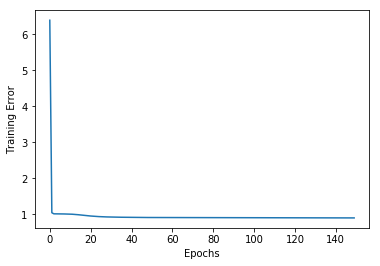

In [5]:
from keras.models import load_model

if os.path.exists('regression_model_dot_product.h5'):
    model = load_model('regression_model_dot_product.h5')
else:
    history = model.fit([train.user_id, train.movie_id], train.rating, epochs=150,batch_size=200 ,verbose=1)
    model.save('regression_model_dot_product.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [6]:
scores = model.evaluate([test.user_id, test.movie_id], test.rating)

predictions = model.predict([test.user_id, test.movie_id])

print("Accuracy: %.2f%%" % (scores*100))

predictions_dot= model.predict([submission.user_id, submission.movie_id])

117696/117696 [==============================] - 2s 14us/step
Accuracy: 100.92%


In [7]:
predictions_dot = np.array([a[0] for a in predictions_dot])
prediction_dot = np.rint(predictions_dot)

prediction_dot = np.where(prediction_dot < 0, 0, prediction_dot)
prediction_dot = np.where(prediction_dot > 5, 5, prediction_dot)



submission.drop('rating',axis = 1, inplace = True)
submission['rating'] = prediction_dot

In [ ]:
from helpers import load_csv
export_csv = load_csv('data/prediction_dot_product',submission)